# Part 03: Machine Learning

## 1. Load Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import sqlite3
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn import metrics
from math import sqrt

## 2. Load Data

In [36]:
conn = sqlite3.connect('./Data/Health.db')
query = 'SELECT * FROM Health'

df = pd.read_sql(query, conn)
df.head()

,date,burned_cals,floors,standing,steps,Cycling,TraditionalStrengthTraining,Walking,min_heartRate,max_heartRate,restingHeartRate,bodyweight,calories,carbs,fats,proteins
0,2019-08-01,2453.825,13.0,0.0,5890.0,0.0,142.233333,15.916866,42.0,88.0,43,82.5,2906.7,325.9,78.7,217.7
1,2019-08-02,2540.693,6.0,0.0,8862.0,0.0,0.000000,61.547137,41.0,93.0,44,82.8,3107.0,359.2,46.8,291.5
2,2019-08-03,2749.121,8.0,0.0,7877.0,0.0,135.133333,16.609410,41.0,120.0,43,83.2,2064.1,156.7,37.0,266.6
3,2019-08-04,2732.874,16.0,0.0,8771.0,0.0,123.550000,15.883201,44.0,101.0,47,83.4,2202.0,235.0,50.4,209.1
4,2019-08-05,2514.237,24.0,0.0,5871.0,0.0,0.000000,0.000000,40.0,91.0,43,83.6,2789.1,243.1,83.1,253.5


## 3. Feature Selection

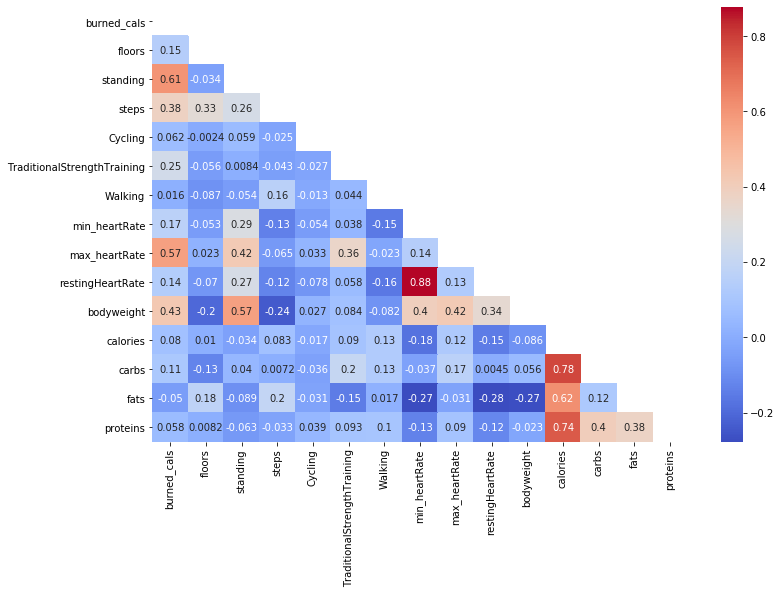

In [37]:
# plot heatmap with pearson correlation
plt.figure(figsize=(12,8))
mask = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=mask, cmap='coolwarm')

plt.show()

In [10]:
# select features and store features and labels separately
X = df.drop(['burned_cals', 'calories', 'carbs', 'fats', 'proteins', 'min_heartRate', 'date'], axis=1)
y = df['burned_cals'].values

## 4. Train-Test-Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print('Number of training samples:', X_train.shape[0])
print('Number of test samples:', X_test.shape[0])

Number of training samples: 211
Number of test samples: 71


## 5. Model Building and Prediction
### 5.1 Model Selection

In [57]:
# models
lm = LinearRegression()
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

# 5-fold cv with linear regression
scores = cross_validate(lm, X_train, y_train, cv=5, scoring=('r2', 'neg_root_mean_squared_error'))
print('Linear Regression:')
print('Average R-squared in cross-validation:', round(scores['test_r2'].mean(), 4))
print('Average RMSE in cross-validation:', round((-1*scores['test_neg_root_mean_squared_error']).mean(), 4))
print()

# 5-fold cv with random forest
scores = cross_validate(rf, X_train, y_train, cv=5, scoring=('r2', 'neg_root_mean_squared_error'))
print('Random Forest:')
print('Average R-squared in cross-validation:', round(scores['test_r2'].mean(), 4))
print('Average RMSE in cross-validation:', round((-1*scores['test_neg_root_mean_squared_error']).mean(), 4))

Linear Regression:
Average R-squared in cross-validation: 0.5465
Average RMSE in cross-validation: 218.3106

Random Forest:
Average R-squared in cross-validation: 0.5954
Average RMSE in cross-validation: 205.6729


### 5.2 Prediction

In [55]:
# fit the model
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)

#predict
y_pred = rf.predict(X_test)

## 6. Evaluation

In [59]:
print('RMSE =', sqrt(mean_squared_error(y_test, y_pred)))

RMSE = 158.3739722030637


In [53]:
# plot predictions vs. real values
predictions = pd.DataFrame(y_pred)
values = pd.DataFrame(y_test)

fig = go.Figure()
fig.add_trace(go.Scatter(x=values.index, y=values[0],
                    mode='lines',
                    name='real values'))
fig.add_trace(go.Scatter(x=predictions.index, y=predictions[0],
                    mode='lines',
                    name='predictions'))

fig.show()